# The numpy.random package

<br>

## Overall purpose of the numpy.random package 

***

NumPy (Numerical Python)is an open source library for scientific computing in Python that’s used in almost every field of science and engineering. It provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

NumPy users include everyone from beginning coders to experienced researchers doing state-of-the-art scientific and industrial research and development. The NumPy API is used extensively in Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and most other data science and scientific Python packages.[1]


Numpy random function is a module inside the numpy library. Random number does NOT mean a different number every time. Random means something that can not be predicted logically.
The puropse of this module is to generate pseudo random numbers through various funtions and methods using PRNG's. 
Pseudo Random Number Generator(PRNG) refers to an algorithm that uses mathematical formulas to produce sequences of random numbers. PRNGs generate a sequence of numbers approximating the properties of random numbers. A PRNG starts from an arbitrary starting state using a seed state. Many numbers are generated in a short time and can also be reproduced later, if the starting point in the sequence is known. Hence, the numbers are deterministic and efficient.

Previously the Numpy random library used bits provided by the the Mersenne Twister (MT19937)PRNG and was the most commonly used in R and Python languages. This was the PRNG used in the legacy *RandomState* random module in Numpy. This has now been replaced with the PCG64 PRNG which has been deemed to have beeter statistical properties than the MT19937. Some reasons the MT19937 may have been replaced was due to some deficiencies mentioned below[2]

- Is not as fast as many PRNG'S.(The application should spend its time running the actual algorithms, not generating random numbers)
- It has a large state (2,500 bytes).
- The implementation is larger than other PRNG'S and more complicated.
- Its has one statistical failure.(It has serious problems around 0, suggesting that it randomizes itself pretty poorly)

Below are some of the differnces and advantages of using the PCG family of bit generators over the Mersenne Twister PRNG.[3]


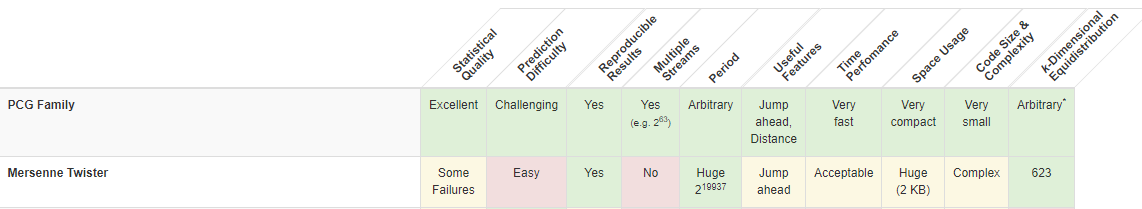


#### What is the purpose of generating random numbers?

Random number does NOT mean a different number every time. Random means something that can not be predicted logically.Computers work on programs, and programs are definitive set of instructions. So it means there must be some algorithm to generate a random number as well.

If there is a program to generate random number it can be predicted, thus it is not truly random.

Random numbers generated through a generation algorithm are called pseudo random.

Why would a programmer or data analyst use this module?  There are several reasons:[4][5]

- The main reason to use randomness is to introduce unpredictability.

- PRNGs are suitable for applications where many random numbers are required and where it is useful that the same sequence can be replayed easily. Popular examples of such applications are simulation and modeling applications.

- Random number generators are used in  several industries to  generate random  values.  These industries  are  not  limited  but  include  gaming,  financial institutions, secure communication, cyber security and others.

- It is random number generation that helps digital currencies, such as Bitcoin, be almost immune to cyber-attack. The algorithms involved in random number generation for such use cases are much more advanced than those used in playlist selection and other simple “random” applications.

- PRNGs are not suitable for applications where it is important that the numbers are really unpredictable, such as data encryption and gambling. These applications require TRNG (True Random Number Generation) or a CSRNG(cryptographic PRNG).


In [1]:
# Lets import the generator:
from numpy.random import default_rng # import default PC6G4 
rng= default_rng(12345)
print(rng) # 

Generator(PCG64)


<br>

## Simple Random Data and Permutations Functions:

***
Four methods used to generate random data:
- Integers
- Random
- Choice
- Bytes


Previously used methods in the legacy random generator included rand,randn,rantint. These are no longer included in the new version. Whilst these methods can still be used we will not cover them
in this package overview. 

In [2]:
# Libraries required to run the notebook
import numpy as np
from numpy import random
from numpy.random import default_rng
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#dir(random) # view directory of all methods available in the random package of numpy

<br>

## Simple Random Data Method 1- Random Integers

***

The first method is the numpy.random.Generator. integers. This method will return random integers from the **discrete uniform distribution** of the specified dtype.
In previous documentation the numpy user would have used the code random.randint to generate this data but in the updated version we are using rng.integers.

In [3]:
# We begin by setting the rng as the np random default generator
rng = np.random.default_rng()

In [4]:
# Generate a random integer up to but not including 4: 
rng.integers(4)

0

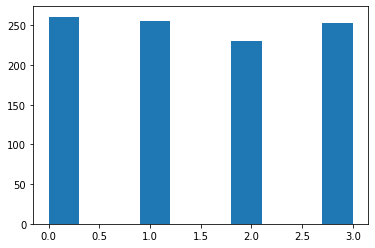

In [5]:
# this will create a random array with numbers up to but not including 4 and the size = 20 random numbers 
p=rng.integers(4, size=1000) # if I use shift+tab here i can get a docstring to show what I need to pass into the function
plt.hist(p) # using matplotlib to visualise the output.
plt.show() # will be a standard uniform distribution on the histogram we can see there is ~250 instances of each number.
#print(p)

[[4 1 6 3 5]
 [5 2 3 2 0]
 [4 1 2 5 4]]


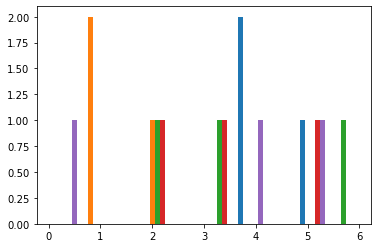

In [6]:
# generate a 3 x 5 array of integers between 0 and 6 inclusive and show results on a histogram:
x= rng.integers(7, size = (3,5))  # 3 is the number of rows 5 is the number of colums
print(x)
plt.hist(x)
plt.show()

In [7]:
# Generate a 2 by 4 array using broadcasting with dtype of uint8
rng.integers([5, 7, 9, 8], [[10], [20]], dtype=np.uint8)

array([[ 6,  7,  9,  9],
       [16, 16, 18, 11]], dtype=uint8)

In [8]:
rng.integers(100, size= 10 ,endpoint=True) # endpoint true means 100 willbe included in the numbers[6]

array([92, 65, 93, 10, 99, 45, 71, 80, 35, 98], dtype=int64)

In [9]:
rng.integers(100, size = (5,5))

array([[24, 68, 90, 14, 11],
       [12, 56, 20, 19, 76],
       [20, 92, 43, 83, 90],
       [30, 71, 11,  0, 49],
       [14, 75, 83, 37, 38]], dtype=int64)

In [10]:
rng.integers (55, size =(3,5,2))# the number 3 here will denote the amount of arrays I want to generate, 5 rows and 2 columns

array([[[47, 29],
        [ 5,  6],
        [ 0, 33],
        [ 7,  0],
        [51, 29]],

       [[12, 26],
        [38, 51],
        [34, 48],
        [51, 44],
        [41, 33]],

       [[44, 19],
        [41, 40],
        [34, 16],
        [54,  8],
        [20,  0]]], dtype=int64)

(array([[1., 0., 0., 1., 2., 1., 1., 1., 2., 1.],
        [2., 1., 1., 2., 0., 0., 0., 1., 0., 3.],
        [1., 0., 2., 1., 0., 1., 2., 1., 2., 0.],
        [1., 0., 2., 1., 0., 0., 2., 3., 1., 0.],
        [2., 0., 1., 1., 0., 0., 0., 1., 4., 1.],
        [1., 1., 2., 1., 1., 0., 3., 1., 0., 0.],
        [0., 2., 1., 0., 1., 0., 2., 2., 1., 1.],
        [1., 1., 2., 2., 0., 1., 1., 1., 1., 0.],
        [1., 0., 0., 0., 3., 1., 1., 2., 1., 1.],
        [3., 0., 1., 2., 1., 1., 1., 1., 0., 0.]]),
 array([  5. , 103.2, 201.4, 299.6, 397.8, 496. , 594.2, 692.4, 790.6,
        888.8, 987. ]),
 <a list of 10 BarContainer objects>)

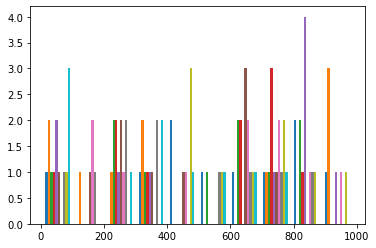

In [11]:
# lets visualise the random interger random function in numpy using the matplotlib
x= rng.integers(1000, size = (10,10))
plt.hist(x)

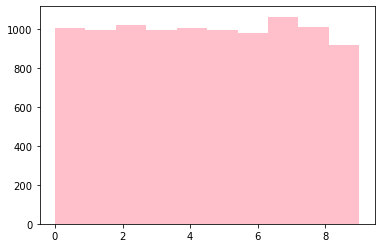

In [12]:
dist = [rng.integers(0,10) for i in range(10000)]
# histogram plot of distribution
plt.hist(dist, color="pink")
plt.show()

In [13]:
#lets create some user input to select some random integers[7]
print("Enter the Range: ")
start = int(input())
end = int(input())


randnum = rng.integers(start, end)
print("\nRandom Number =", randnum)

Enter the Range: 


 3
 4



Random Number = 3


In [14]:

# Generate Multiple Random Numbers in Given Range[7]
print("Enter the Range (Interval): ")
a = int(input())
b = int(input())

if a>b:
  t = a
  a = b
  b = t

print("\nHow Many Random Numbers to Generate ? ")
tot = int(input())

randnums = []
for i in range(tot):
  randnums.append(rng.integers(a, b))

print("\nList of " +str(tot)+ " Random Numbers between " +str(a)+ " and " +str(b))
for i in range(tot):
  print(randnums[i], end=" ")
print()

Enter the Range (Interval): 


 3
 6



How Many Random Numbers to Generate ? 


 6



List of 6 Random Numbers between 3 and 6
3 3 3 5 5 4 


<br>

## Simple Random Data Method 2- Random 

***

Return random floats in the half-open interval [0.0, 1.0).
Results are from the **continuous uniform distribution** over the stated interval.







In [15]:
rng.random() # will return a flaoting point number between 0-1

0.860844320076517

In [16]:
rng.random(10)# returns an array of 10 random floating point numbers 

array([6.95455368e-02, 9.81948043e-01, 9.90534282e-01, 7.40430796e-01,
       2.75027105e-01, 9.01806448e-01, 9.02612327e-04, 9.26696154e-01,
       4.23037045e-01, 3.15738153e-01])

In [17]:
rng.random((5,)) # will return a random array with five floating point numbers

array([0.87035078, 0.23221687, 0.97866172, 0.60216025, 0.83393537])

In [18]:
#Generate an 4x3 array of floats between 5 and 10
rng.random((4,3)) * 5 + 5


array([[7.88407063, 6.19147201, 8.18599938],
       [7.76195646, 9.94003719, 7.01528019],
       [5.45961769, 5.55274383, 7.10912873],
       [8.78969437, 8.61873866, 7.77521709]])

In [19]:
# Another way to write the above code in a different format
5*rng.random((3,3)) + 5

array([[8.32512348, 8.78437489, 6.66643923],
       [7.35561088, 5.75831725, 6.18382313],
       [8.16391866, 5.92385024, 6.68090848]])

In [20]:
6 *rng.random((3, 2)) - 9 #Three rows-by-two colums array of random numbers from [-9, -3 ):

array([[-5.76038238, -8.18651338],
       [-5.66621422, -6.6974388 ],
       [-8.75521104, -7.68132646]])

In [21]:
np.random.rand(3,2) # previous coding used with the MT19937 generator 
#https://github.com/Disha-Shivale/Numpy-RandomNumber/blob/main/Numpy%20-%20Random%20number.ipynb

array([[0.91947774, 0.03239449],
       [0.05110756, 0.47612305],
       [0.97021973, 0.47725018]])

In [22]:
rng.random((3,2)) # new coding for a similiar array using the updated API reference material

array([[0.11706345, 0.41009639],
       [0.2605769 , 0.87851118],
       [0.13294728, 0.25084187]])

In [23]:
# this will return a list of 10 random numbers  
for i in range (10):
    print(rng.random())
    

0.350350228763736
0.40042581513374953
0.13846402467055585
0.5480181202541426
0.7707107148082951
0.20704747582803273
0.13316543016812898
0.8195504864128906
0.38987223018571016
0.20081302721755367


In [24]:
#https://realpython.com/python-random/
#One thing you might have noticed is that a majority of the functions from random return a 
#scalar value (a single int, float, or other object). If you wanted to generate a sequence of random numbers,
#one way to achieve that would be with a Python list comprehension:

[rng.random() for _ in range(5)]


[0.9238741012914437,
 0.7882122759613475,
 0.5096477524116713,
 0.6979586413156819,
 0.03561805460587342]

#### Simulating Four Random Coin Flips using random method [8,9]

rng. random will draw numbers between 0 and 1. If a number is drawn that is <0.5 we say it is heads. If the number drawn is >0.5 it is tails.This type of result where results are either True (Heads) or False (Tails) is referred to as Bernoulli trial. 

We want to get the probability that we will get 4 heads in the four flips if we were to repeat the flips 10000 times 


In [25]:
n_all_heads = 0 #We need to initialize the number to zero and then do 10,000 repeats of the 4 flip trials
for _ in range (10000): # using a four loop to simulate the flips
    heads =rng.random(size=4) < 0.5 # use the boolen value to denote that <0.5 is heads 
    n_heads = np.sum(heads) 
    if n_heads == 4:
        n_all_heads += 1
        
n_all_heads / 10000 # divide amount of times it was all heads in the four flips by the no of trials to get the probability.


0.0636

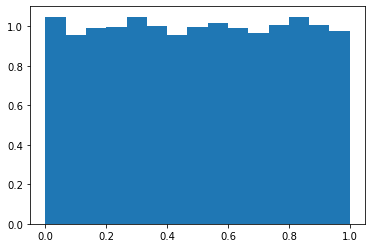

In [26]:
# Using a histogram to visualize the continuois uniform distribution the random method for generating data will give:
x= rng.random((20000,))

c, bin, ig = plt.hist(x, 15, density = True)
plt.show()


<br>

### Simple Random Data Method 3- Choice Method

***

The NumPy random choice() function is used to gets the random samples of a **one-dimensional array** which returns as the random samples of NumPy array. The NumPy random choice() function accepts four parameters. The mandatory parameter is the list or array of elements or numbers. When we pass the list of elements to the NumPy random choice() function it randomly selects the single element and returns as a one-dimensional array, but if we specify some size to the size parameter, then it returns the one-dimensional array of that specified size.This is uselful when you want to choose multiple random items from a particular list .The NumPy random choice() function generate random samples which are commonly used in data statistics, data analysis, data-related fields, and all and also can be used in probability, machine learning, Bayesian statistics, and all.[1,10,11]



In [27]:
#Generate a uniform random sample from np.arange(5) of size 3:
rng.choice(5, 3)

array([3, 1, 2], dtype=int64)

In [28]:
#Generate a non-uniform random sample from np.arange(5) of size 3: Setting user-specified probabilities through p uses a more general but less efficient sampler than the default.
rng.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])


array([2, 3, 3], dtype=int64)

In [29]:
# generate 20 sizes of numbers in the range [0,59]
d = rng.choice(60,20)
print('The output of random choice function for 20 sample numbers between 0 and 59 is:')
print(d)

The output of random choice function for 20 sample numbers between 0 and 59 is:
[54 18 27 15 46 44 32 41 23 37 42  9 41 20 38 34 48 19 12 33]


In [30]:
list_movie = [ 'The Godfather', 'The Shawshank Redemption', 'The Wizard of Oz', 'Citizen Kane', 'Pulp Fiction' ] # Using choice() method of random class tp choose three elements in the list
rng.choice( list_movie, size = 3, replace = True)  # replace is true meaning the same element can be chosen more than once

array(['The Godfather', 'The Godfather', 'Citizen Kane'], dtype='<U24')

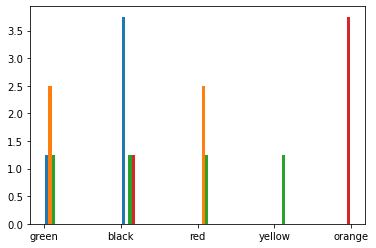

In [31]:
colours = ["green", "red", "yellow","black","orange"]

results = rng.choice (colours, size= (4,4)) # using choice to create a 4x4 array of colours using random choice
count, bins, ignored = plt.hist(results, 20, density = True ) # create a histogram to visual see the colour randomly choosen of each colour
plt.show()

In [32]:
colours = ["green", "red", "yellow","black","orange"]
#Setting user-specified probabilities through p uses a more general but less efficient sampler than the default. 
#The general sampler produces a different sample than the optimized sampler even if each element of p is 1 / len(a).
rng.choice(colours, 5, p=[0.5, 0.1, 0.1, 0.2,0.1])
#rng.choice(colours, size=(4,4))


array(['green', 'black', 'green', 'orange', 'green'], dtype='<U6')

[2 0 4 3]


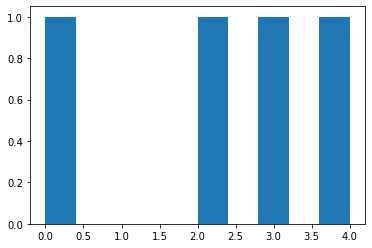

In [33]:
#Generate a non-uniform random sample from np.arange(5) of size 3:
x=rng.choice(5, 4, replace=False)#p=[0.1, 0, 0.3, 0.6, 0])
print(x)
plt.hist(x)
plt.show()

In [34]:
#Generate a uniform random sample from np.arange(5) of size 3 without replacement:
rng.choice(5, 3, replace=False)
#This is equivalent to rng.permutation(np.arange(5))[:3]

array([4, 3, 2], dtype=int64)

In [35]:
#Generate a uniform random sample from a 2-D array along the first axis (the default), without replacement:
rng.choice([[0, 1, 2], [3, 4, 5], [6, 7, 8]], 2, replace=False)

array([[0, 1, 2],
       [3, 4, 5]])

<br>

### Paper, Rock or Scissors Game using random choice

***
This is a very simple way to put the random.choice method into action. A game we are all hopefully farmiliar with.[12]


In [36]:


user_action = input("Enter a choice (rock, paper, scissors): ") # first question to prompt user to select a variable
possible_actions = ["rock", "paper", "scissors"] # possible selections of the user
computer_action = rng.choice(possible_actions) # using rng.choice the comp will randomly slect one of the possible variables in the array
print(f"\nYou chose {user_action}, computer chose {computer_action}.\n") #Now that both players have made their choice, you just need a way to decide who wins. 
if user_action == computer_action: #Using an if … elif … else block, you can compare players’ choices and determine a winner:
    print(f"Both players selected {user_action}. It's a tie!") # by comparing the tie condition first you eliminate quite a few possible actions (3 to be exact)
elif user_action == "rock":
    if computer_action == "scissors":
        print("Rock smashes scissors! You win!")
    else:
        print("Paper covers rock! You lose.")
elif user_action == "paper":
    if computer_action == "rock":
        print("Paper covers rock! You win!")
    else:
        print("Scissors cuts paper! You lose.")
elif user_action == "scissors":
    if computer_action == "paper":
        print("Scissors cuts paper! You win!")
    else:
        print("Rock smashes scissors! You lose.") 
                 
# by comparing the tie condition first you need only write the elif/if/else block for the other six possible outcomes.    

Enter a choice (rock, paper, scissors):  rock



You chose rock, computer chose scissors.

Rock smashes scissors! You win!


### Simple Random Data Method 3- Bytes

In [37]:
np.random.default_rng().bytes(200)

b"\xc3|\xa8\xd8\xcf5\xecw*3\xf0\x97O\xdd\xd4^b\x0f\xca\xd0\xce\x92i\x0b\xd0\x07\xe3\xd6'\xec\x875{a\xf5\n\xc7\x1bl\xd8\x85\x83|\xb2@,\x99^6L\xe9\xef\xcb\x93\x05:\x98\\>\xe3\xea\xbbBa!d\xa4\xc0\x91_OB0[!E\x94\xec&\xa0\xb0\x9e\xb9\x9f\xdfZhkT\xc5\xc7\x17\x0c0\xdc\x1b8\x17\x95\xcc\xd7\xe1\r\x00\xc0\xab\x16:a.\xa8\x00C_\xa8i\t\x93\x92\xfeFi\xc7\xf7\xf5\x8d\xf4\xa4\xaeG\xde\xf7q\xc9\xef\x00\xac\x02\x9ab\xc6P\xff\x9e5\x94\xd2\xc3\xbf\xe4\xb7\xdcA\xe9\xedd\x81\xf1\xe6'|\xd5\x9duY\x16a\xd3U\xccl)\xa3c\xa8\x1c]`l\xee;A\xf4\xee\x10\xb5\xb6\x8a\x11\xf3\xd1\xed-o\x1c\xd7\x7f\xf3\xe0\x1d"

<br>

# Permutations

***

The methods for randomly permuting a sequence are:

- shuffle(x[, axis]): Modify an array or sequence in-place by shuffling its contents.

- permutation(x[, axis]):Randomly permute a sequence, or return a permuted range.

- permuted(x[, axis, out]): Randomly permute x along axis axis.

A permutation refers to an arrangement of elements. e.g. [3, 2, 1] is a permutation of [1, 2, 3] and vice-versa.

The main difference between Generator.shuffle and Generator.permutation is that Generator.shuffle operates in-place, while Generator.permutation returns a copy.[13]


In [38]:
rng = np.random.default_rng()
x = np.arange(0, 15).reshape(3, 5)
x


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [39]:
y = rng.permuted(x, axis=1, out=x)


In [40]:
x

array([[ 0,  2,  1,  3,  4],
       [ 6,  5,  8,  9,  7],
       [12, 10, 11, 14, 13]])

In [41]:
y # this is the same output for x and y. 

array([[ 0,  2,  1,  3,  4],
       [ 6,  5,  8,  9,  7],
       [12, 10, 11, 14, 13]])

In [42]:
y is x

True

Handling the axis parameter
An important distinction for these methods is how they handle the axis parameter. Both Generator.shuffle and Generator.permutation treat the input as a one-dimensional sequence, and the axis parameter determines which dimension of the input array to use as the sequence. In the case of a two-dimensional array, axis=0 will, in effect, rearrange the rows of the array, and axis=1 will rearrange the columns. 

In [43]:
rng = np.random.default_rng()
x = np.arange(0, 15).reshape(3, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [44]:
rng.permutation(x, axis=1) # rearrange the columns.

array([[ 1,  3,  2,  4,  0],
       [ 6,  8,  7,  9,  5],
       [11, 13, 12, 14, 10]])

In [45]:
rng.permutation(x, axis=0) #axis = 0 has rearranged the rows while axis = 1 will rearrange the columns. The columns have been rearranged in bulk
#values within the columns have not changed 

array([[ 5,  6,  7,  8,  9],
       [ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14]])

<br>

The method Generator.permuted treats the axis parameter similar to how numpy.sort treats it. Each slice along the given axis is shuffled independently of the others. Compare the following example of the use of Generator.permuted to the above example of Generator.permutation:

In [46]:
rng.permuted(x, axis=1) # when permuted in run the entire array permuted and columns along with rows are changed.

array([[ 2,  3,  1,  0,  4],
       [ 9,  7,  5,  8,  6],
       [10, 14, 11, 13, 12]])

In [47]:
arr= [2,5,9,8,6,8,9]
result = rng.permutation(arr)
result # input is an array the output is a permuted array of the numbers 

array([6, 9, 2, 8, 8, 9, 5])

In [48]:
arr1 = np.arange(16).reshape((4,4))
result1 = rng.permutation(arr1)
arr2 = np.arange(16).reshape((4,4))
result2 = rng.permuted(arr2)
print(result1)

print(result2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 6 15  9  8]
 [ 1 12  2  4]
 [ 0  7 11  3]
 [10 14  5 13]]


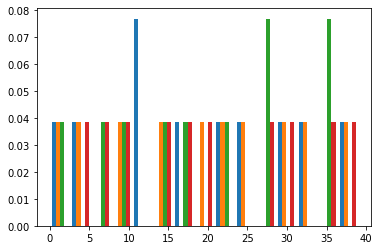

In [49]:
arr1 = np.arange(40). reshape((10,4))
arr = rng.permuted(arr1, axis=1)
c,bin, ig =plt.hist(arr, 15, density =True)
plt.show()

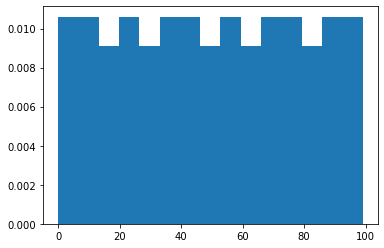

In [50]:
arr = np.random.permutation(100)
   
c, bin, ig = plt.hist(arr, 15, density = True)
plt.show()

In [51]:
#using the permutation function with pandas module[14]
raw_data = {"county": ["Cavan", "Meath","Leitrim","Dublin","Kildare","Louth"], "Rank": ["1st","2nd","3rd","4th","5th","6th"], "CovidCases":["26","99","45","189","145","99"]
            , "CovidDeaths": ["2","4","1","20","12","8"]}

df= pd.DataFrame(raw_data, index = pd.Index (["A","B","C","D","E","F",], name = "letter"),
                columns = pd.Index (["county","Rank","CovidCases","CovidDeaths"], name = "attributes"))

In [52]:
df

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
A,Cavan,1st,26,2
B,Meath,2nd,99,4
C,Leitrim,3rd,45,1
D,Dublin,4th,189,20
E,Kildare,5th,145,12
F,Louth,6th,99,8


In [53]:
nrows= df.shape[0] # this will give us back the number of rows

In [54]:
b = rng.permutation (nrows)

In [55]:
b # will give back a permutated sequence of the number of rows in an array

array([0, 3, 4, 1, 2, 5])

In [56]:
df.take(b) # takes the indices and changes the orders of the rows to the indices that we pass it

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
A,Cavan,1st,26,2
D,Dublin,4th,189,20
E,Kildare,5th,145,12
B,Meath,2nd,99,4
C,Leitrim,3rd,45,1
F,Louth,6th,99,8


In [57]:
df.index

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object', name='letter')

In [58]:
#we can randomize this list of letters 
rng.permutation(df.index)

array(['D', 'C', 'F', 'A', 'E', 'B'], dtype=object)

In [59]:
df.reindex(rng.permutation(df.index))

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
D,Dublin,4th,189,20
F,Louth,6th,99,8
E,Kildare,5th,145,12
C,Leitrim,3rd,45,1
A,Cavan,1st,26,2
B,Meath,2nd,99,4


In [60]:
df.sample(n=nrows)

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
B,Meath,2nd,99,4
E,Kildare,5th,145,12
D,Dublin,4th,189,20
C,Leitrim,3rd,45,1
A,Cavan,1st,26,2
F,Louth,6th,99,8


In [61]:
s = df['county']
len(s) #length of city coulumn

6

In [62]:
rng.permutation(len(s))

array([2, 0, 4, 1, 3, 5])

In [63]:
r_entries=rng.permutation(len(s))

In [64]:
df

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
A,Cavan,1st,26,2
B,Meath,2nd,99,4
C,Leitrim,3rd,45,1
D,Dublin,4th,189,20
E,Kildare,5th,145,12
F,Louth,6th,99,8


In [65]:
s[r_entries]

letter
C    Leitrim
F      Louth
D     Dublin
A      Cavan
E    Kildare
B      Meath
Name: county, dtype: object

In [66]:
s[r_entries].values

array(['Leitrim', 'Louth', 'Dublin', 'Cavan', 'Kildare', 'Meath'],
      dtype=object)

In [67]:
df['county']=s[r_entries].values

In [68]:
df #you can see now the county column has been randomised 

attributes,county,Rank,CovidCases,CovidDeaths
letter,,,,
A,Leitrim,1st,26,2
B,Louth,2nd,99,4
C,Dublin,3rd,45,1
D,Cavan,4th,189,20
E,Kildare,5th,145,12
F,Meath,6th,99,8


<br>

Generator.shuffle works on non-NumPy sequences. That is, if it is given a sequence that is not a NumPy array, it shuffles that sequence in-place.

In [69]:
a = ['A', 'B', 'C', 'D', 'E']
rng.shuffle(a)
a


['D', 'E', 'C', 'A', 'B']

<br>
The shuffle() method returns the modified form of the original sequence.[15] As can be seen by the code below the original sequence gets shuffled, no new sequence is returned by the method.


In [70]:
# Making a list of integers
samples = [10, 20, 30, 40, 50, 60]

# Converting  the list into a numpy array
seq = np.array(samples)

# Printing content of original sequence
print("Original order of the sequence is :", seq)

# Performing shuffling operation
rng.shuffle(seq)

# Printing the content of sequence after shuffling
print("\nOutput sequence obtained after shuffling is: ", seq)

Original order of the sequence is : [10 20 30 40 50 60]

Output sequence obtained after shuffling is:  [40 10 50 60 20 30]


<br>
In the below code example, a multi-dimensional array of shape 3X3 was made as an original sequence that contains few random integer values.
We can view the order of the elements of the original sequence by printing its content. Then, this sequence is passed as the only parameter inside the numpy.random.shuffle() to modify its content. The shuffle() method returns a shuffled sequence, and it could be verified by printing the order of elements in the modified sequence that the sub-arrays get shuffled only along its first axis, i.e., in rows.
Also, the content stored inside the sub-arrays remains in the same order, and they don’t get shuffled.

In [71]:
# Making original sequence of multi-dimensional array
seq = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

# Printing the shape of multi-dimensional array
print("Shape of original sequence is: ", seq.shape)

# Printing content of original sequence
print("Original order of the sequence is :", seq)

# Performing shuffling operation
rng.shuffle(seq)

# Printing the content of sequence after shuffling
print("\nOutput sequence obtained after shuffling is: ", seq)
print("Shape of shuffled sequence is: ", seq.shape)

Shape of original sequence is:  (3, 3)
Original order of the sequence is : [[9 8 7]
 [6 5 4]
 [3 2 1]]

Output sequence obtained after shuffling is:  [[6 5 4]
 [9 8 7]
 [3 2 1]]
Shape of shuffled sequence is:  (3, 3)


In [72]:
#Let us pass a 3-dimensional array to the rng.shuffle method.
#https://www.blogarama.com/technology-blogs/1302264-likegeeks-blog/38775926-amazing-numpy-shuffle-examples
x = 5 * rng.random((4,3,3)) - 100

print(f"x:\n{x}\n")

rng.shuffle(x) 

print(f"shuffled x:\n{x}")

x:
[[[-96.44496386 -97.15483018 -96.27730918]
  [-95.05911837 -98.58260486 -96.25974356]
  [-95.95186208 -96.09498068 -99.27175219]]

 [[-98.60720829 -97.57250716 -98.61088444]
  [-95.23174251 -99.07878056 -96.21641329]
  [-95.29287839 -99.84691891 -99.83727379]]

 [[-95.90057332 -96.91831027 -99.89452087]
  [-96.95365256 -95.93874904 -99.98296447]
  [-98.07413482 -98.51122606 -99.75470917]]

 [[-95.13544532 -95.30813163 -96.96156522]
  [-96.34998325 -99.16271757 -96.5560425 ]
  [-98.24419156 -98.85748342 -98.6993286 ]]]

shuffled x:
[[[-96.44496386 -97.15483018 -96.27730918]
  [-95.05911837 -98.58260486 -96.25974356]
  [-95.95186208 -96.09498068 -99.27175219]]

 [[-95.90057332 -96.91831027 -99.89452087]
  [-96.95365256 -95.93874904 -99.98296447]
  [-98.07413482 -98.51122606 -99.75470917]]

 [[-95.13544532 -95.30813163 -96.96156522]
  [-96.34998325 -99.16271757 -96.5560425 ]
  [-98.24419156 -98.85748342 -98.6993286 ]]

 [[-98.60720829 -97.57250716 -98.61088444]
  [-95.23174251 -99.0787

<br>

## Probability Distributions 

***
Probability distributions are statistical functions that describe the likelihood of obtaining possible values that a random variable can take. In other words, the values of the variable vary based on the underlying probability distribution.

Suppose you draw a random sample and measure the heights of the subjects. As you measure heights, you create a distribution of heights. This type of distribution is useful when you need to know which outcomes are most likely, the spread of potential values, and the likelihood of different results.

Probability distributions indicate the likelihood of an event or outcome. Statisticians use the following notation to describe probabilities:

p(x) = the likelihood that random variable takes a specific value of x.

The sum of all probabilities for all possible values must equal 1. Furthermore, the probability for a particular value or range of values must be between 0 and 1.

Probability distributions describe the dispersion of the values of a random variable. Consequently, the kind of variable determines the type of probability distribution. For a single random variable, statisticians divide distributions into the following two types:

1) Discrete probability distributions for **discrete variables**:

There are a variety of discrete probability distributions that you can use to model different types of data. The correct discrete distribution depends on the properties of your data. For example, use the:

- Binomial distribution to model binary data, such as coin tosses.
- Poisson distribution to model count data, such as the count of library book checkouts per hour.
- Uniform distribution to model multiple events with the same probability, such as rolling a die.

2) Probability density functions for **continuous variables**:

Continuous probability functions are also known as probability density functions. You know that you have a continuous distribution if the variable can assume an infinite number of values between any two values. 

There are a variety of probability distributions for continuous data. These distributions include the following:
- The most well-known continuous distribution is the normal distribution, which is also known as the Gaussian distribution or the “bell curve.” This symmetric distribution fits a wide variety of phenomena, such as human height and IQ scores. It has two parameters—the mean and the standard deviation
- Weibull distribution: A particularly versatile distribution that analysts use in many settings. Can model left- and right-skewed data and approximate the normal distribution.
- Exponential distribution: Models variables in which small values occur more frequently than higher values. Use to model the amount of time between independent events.
- Gamma distribution: Models right-skewed distributions. Use to model the time until the kth event, where k is the shape parameter.
- Uniform distribution: Models symmetric, continuous data where all equal sized ranges have the same probability.

You can use equations and tables of variable values and probabilities to represent a probability distribution. 


<br>

## Binomial Distributions

***
The binomial distribution is a common discrete distribution used in statistics, as opposed to a continuous distribution, such as the normal distribution. This is because the binomial distribution only counts two states, typically represented as 1 (for a success) or 0 (for a failure) given a number of trials in the data. The binomial distribution thus represents the probability for x successes in n trials, given a success probability p for each trial.

The binomial distribution is often used in social science statistics as a building block for models for dichotomous outcome variables, like whether a Republican or Democrat will win an upcoming election or whether an individual will die within a specified period of time, etc.


The **probability mass function (pmf)** of binomial distribution is defined as:

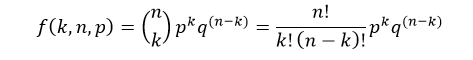


Binomial Distribution
Where,
- p is the probability of success in each trial
- q is the probability of failure in each trial, q = 1 - p
- n is number of trials
- k is the number of successes which can occur anywhere among the n trials


*Parameters*
----------
- n : int or array_like of ints
    Parameter of the distribution, >= 0. Floats are also accepted,
    but they will be truncated to integers.
- p : float or array_like of floats
    Parameter of the distribution, >= 0 and <=1.
- size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``n`` and ``p`` are both scalars.
    Otherwise, ``np.broadcast(n, p).size`` samples are drawn.

*Returns*
-------
- out : ndarray or scalar
    Drawn samples from the parameterized binomial distribution, where
    each sample is equal to the number of successes over the n trials.


In [73]:
#Lets start using the numpy random binomial generator code to draw samples from a distribution (16)
# The below code will generate a random dataset with the parametes we input into the code. Number of trials is 20. Probability of success is 0.5. Size is 1000 (number of times each trial was performed)
size=1000
sample = rng.binomial(20, 0.5, size) # using shift+tab will give me the docstring to show parameters and returns
sample


array([ 9, 13, 15, 11, 12, 11,  8,  7,  6,  8, 14, 12, 14, 11,  9, 11, 12,
       13, 10, 10, 12,  9, 10,  9, 11,  9, 12, 14, 10,  9, 15, 12,  5, 11,
       11, 12, 10,  7, 10, 10,  9, 10, 12,  6,  7,  9,  9, 11,  6, 14, 11,
       11, 13, 14, 12,  9, 10, 12,  9, 11, 13, 11, 10,  7, 10, 13,  8, 10,
       10, 11, 12,  8,  6,  9, 11, 10, 11,  9, 11, 12,  7, 11,  7,  8,  9,
       11, 11, 11, 10, 10,  7,  9,  9, 10, 11, 13, 12,  7,  9, 12, 13,  8,
       10,  8, 12,  8, 11,  9,  9,  9, 10, 12, 11,  9, 11, 13, 11,  8, 11,
       11,  9,  9, 10,  7,  9,  8, 11,  9, 13, 12, 13, 10, 13, 10,  9,  8,
       10, 11,  9,  9, 11,  9, 11, 11, 11,  9, 11, 10,  9,  9, 12,  9, 11,
       10, 13,  5, 13, 12, 10, 13,  9, 10,  8, 14,  8, 10,  8,  6,  7, 10,
        9,  9, 13,  8,  9, 13,  8, 11, 14, 12, 13,  8, 10, 11, 14,  8, 11,
       10, 15, 12,  8, 12, 10,  9, 11, 14, 12,  9, 14,  8,  9, 10, 12,  9,
       10,  9,  9,  5,  9, 10,  8,  9,  7, 13, 10, 10, 10, 10, 10,  8,  7,
        7, 13,  6, 10, 13

### Plotting the Binomial Distribution

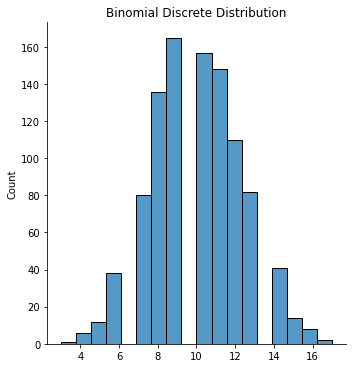

In [74]:
# SNS was used to plot the binomial distribution. As the probability was 0.5% you would expect most points to fall at  the 50% mark in the graph which is represented below.
sample = rng.binomial(20, 0.5, 1000)
sns.displot(sample)
plt.title('Binomial Discrete Distribution')
plt.show()


<br>

### Binomial Distribution when tossing a coin:

 Using the same data as above we can simulate a binomial distribution for tossing a coin 20 times; Here, the random variable X is the number of “successes” that is the number of times heads occurs. The probability of getting a heads is 0.5. The diagram below represents the binomial distribution for 10000 experiments.

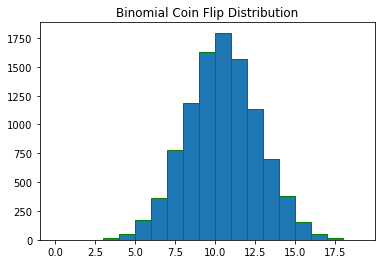

In [75]:
#plot the probability mass function (pmf) of binomial distribution using hist() function. Again with this visual representation we are using the same data as above but changing the ploting code slightly
# to include the bin no and also increasing the size of the experiment number. We also set the seed so the number will be the same each time the code is run.
np.random.seed(10)

size = 10000 # number of experiments 
sample = rng.binomial(20, 0.5, size) 
bin = np.arange(0,20,1)
#print(sample)
plt.hist(sample, bins=bin, edgecolor='green') 
plt.title("Binomial Coin Flip Distribution") 
plt.show()

<br>

Looking at the same coin flip experiment with the trial number changed and using a kdeplot from seaborn to see the distributions together.

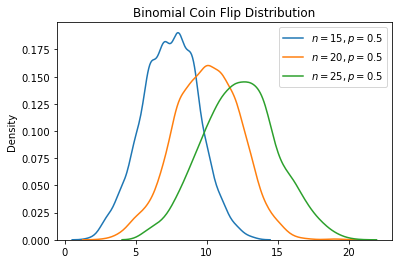

In [76]:
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different binomial distribution
sns.kdeplot(np.random.binomial(15, 0.5, size))
sns.kdeplot(np.random.binomial(20, 0.5, size))
sns.kdeplot(np.random.binomial(25, 0.5, size))
plt.title("Binomial Coin Flip Distribution")
plt.legend(["$n = 15, p = 0.5$", 
            "$n = 20, p = 0.5$", 
            "$n = 25, p = 0.5$"])
plt.show()

<br>

Multiple cumulative distribution functions can be compared graphically using Seaborn ecdfplot() function. In the example below, cdf of three binomial distributions (each with different number of trials but same probability of success) are compared.[16]

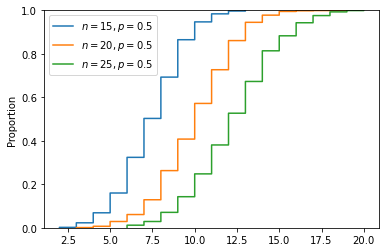

In [77]:
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different binomial distribution
sns.ecdfplot(np.random.binomial(15, 0.5, size))
sns.ecdfplot(np.random.binomial(20, 0.5, size))
sns.ecdfplot(np.random.binomial(25, 0.5, size))

plt.legend(["$n = 15, p = 0.5$", 
            "$n = 20, p = 0.5$", 
            "$n = 25, p = 0.5$"])
plt.show()

<br>

### Binomial Distribution and Scipy Library.

You can also answer questions about binomial probabilities by using the binom function from the scipy library

It is known that 70% of individuals support a certain law. If 10 individuals are randomly selected, what is the probability that between 4 and 6 of them support the law.
The below probability of between 4 and 6 people supporting the law is 33.9%.

In [78]:
from scipy.stats import binom

#calculate binomial probability
binom.cdf(k=6, n=10, p=0.7) - binom.cdf(k=3, n=10, p=0.7)


0.3397972032000002

In [79]:
#calculate binomial probability
binom.cdf(k=6, n=9, p=0.8)

0.261802496

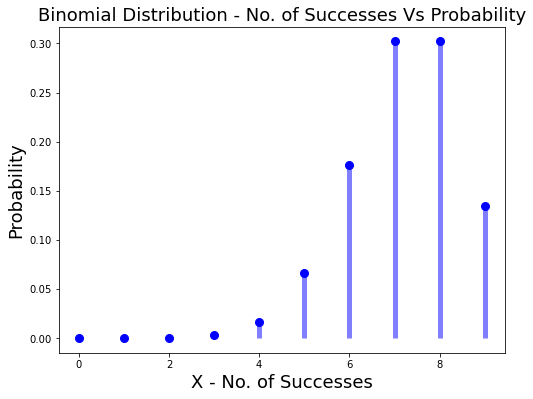

In [80]:
#https://vitalflux.com/binomial-distribution-with-python-code-examples/
#https://vitalflux.com/binomial-distribution-defined-with-10-examples/
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
# 80% of people who purchase pet insurance are women.  If 9 pet insurance owners are randomly selected, find the probability that exactly 6 are women.
# X = Discrete random variable representing number of successes
# p = Probability of the success
#
X = np.arange(0,10)
p = 0.8
n = 9
#
# Calculate binomial probability distribution
#
binom_pd = binom.pmf(X, n, p)
#
# Plot the probability distribution
#
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, binom_pd, 'bo', ms=8, label='geom pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Successes", fontsize="18")
plt.title("Binomial Distribution - No. of Successes Vs Probability", fontsize="18")
ax.vlines(X, 0, binom_pd, colors='b', lw=5, alpha=0.5)
plt.show()

No. of correct answers from multiple-choice questions: Probability of getting right answers out of 20 multiple-choice questions when one out of 4 options were chosen arbitrarily. Here, the random variable X is the number of “successes” that is the number of right answers. Let’s say, the probability/proportion of an answer being right is 1/4 or 0.25 or 25%. The binomial distribution could be represented as B(20,0.25)

In [81]:
# ref: https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.binomial.html
n, p = 20, .25  # number of trials, probability of each trial
size = 1000
s = rng.binomial(n, p, size)

# lets check the probability of 8 answers being corrected selected in the multiple choice questioneaire and simulate the trail 20000 times
sum(rng.binomial(20, 0.25, 20000) == 8)/20000.
# there is a 0.06225% chance of 8 answers being correct or 6.225% chance

0.06055

In [82]:
#ref https://machinelearningmastery.com/discrete-probability-distributions-for-machine-learning/
# check what the ditribution is of no of answers being correct. With probability of 0.25 the average correct amount of answers is 5 out of twenty. 
# example of using the pmf for the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.25
k = 20
# define the distribution
dist = binom(k, p)
# calculate the probability of n successes
for n in range(0, 21, 1):
	print('P of %d success: %.3f%%' % (n, dist.pmf(n)*100))



P of 0 success: 0.317%
P of 1 success: 2.114%
P of 2 success: 6.695%
P of 3 success: 13.390%
P of 4 success: 18.969%
P of 5 success: 20.233%
P of 6 success: 16.861%
P of 7 success: 11.241%
P of 8 success: 6.089%
P of 9 success: 2.706%
P of 10 success: 0.992%
P of 11 success: 0.301%
P of 12 success: 0.075%
P of 13 success: 0.015%
P of 14 success: 0.003%
P of 15 success: 0.000%
P of 16 success: 0.000%
P of 17 success: 0.000%
P of 18 success: 0.000%
P of 19 success: 0.000%
P of 20 success: 0.000%


### Comparing the Binomial Distribution with the Normal Distribution

 The only difference between a normal and a binomial distribution is that binomal is discrte whereas the normal is continuous.This means that in binomial distribution there are no data points between any two data points. This is very different from a normal distribution which has continuous data points.
In other words, there are a finite amount of events in a binomial distribution, but an infinite number in a normal distribution.
Still, if the sample size for binomial distribution is large enough, its shape will be quite similar to that of normal distribution. Below we have compared the two distributions using the displot function in the Seaborn library.

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


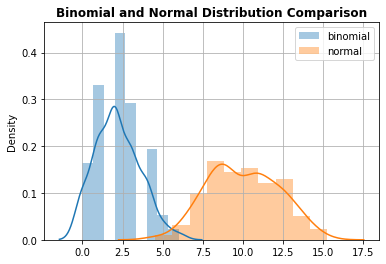

In [122]:
sns.distplot(rng.binomial(n=10, p=0.2, size=200), label='binomial')
sns.distplot(np.random.normal(loc=10, scale=2, size=200), label='normal')
legend = plt.legend()

plt.title('Binomial and Normal Distribution Comparison', fontweight = 'bold')
plt.grid(True)
plt.show()


<br>

By changing some parameters in the code we can see that binomial and normal distributions look quite similiar when plotted against each other. The reason being that we have increased the size to 1000 making the distributions align better. Also the pobability has been changed to 0.5 and the loc on the normal distribution code has been changed to 5. Ths has resulted in the mean of both distributions accumalating around 5 and the ditribution curves aligning. 

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


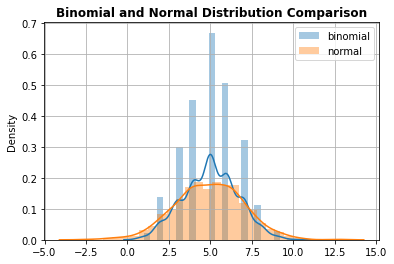

In [131]:
sns.distplot(rng.binomial(n=10, p=0.5, size=1000), label='binomial')
sns.distplot(np.random.normal(loc=5, scale=2, size=1000), label='normal')
legend = plt.legend()

plt.title('Binomial and Normal Distribution Comparison', fontweight = 'bold')
plt.grid(True)


plt.show()

<br>

### The Chisquare Distribution

***

The chi-squared distribution is used primarily in hypothesis testing, and to a lesser extent for confidence intervals for population variance when the underlying distribution is normal.(https://en.wikipedia.org/wiki/Chi-squared_distribution) It arises in the following hypothesis tests,
- Chi-squared test of independence in contingency tables
- Chi-squared test of goodness of fit of observed data to hypothetical distributions
- Likelihood-ratio test for nested models
- Log-rank test in survival analysis
- Cochran–Mantel–Haenszel test for stratified contingency tables
- It is also a component of the definition of the t-distribution and the F-distribution used in t-tests, analysis of variance, and regression analysis.


*Parameters*
- df: float or array_like of floats
Number of degrees of freedom, must be > 0.

-  size: int or tuple of ints, optional
Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if df is a scalar. Otherwise, np.array(df).size samples are drawn.

*Returns*
- out: ndarray or scalar
Drawn samples from the parameterized chi-square distribution.

In [142]:
# We will create a dataset using the random generator chi-square method when the df=3 and the size=100
np.random.default_rng().chisquare(3,100)

array([1.53564149, 2.83044278, 1.99117133, 0.80648359, 1.15541552,
       2.73012394, 2.89863597, 2.95344302, 0.16465123, 3.87545372,
       1.32177679, 3.16016729, 8.80615353, 0.46334335, 7.6967775 ,
       2.18497894, 4.57962045, 1.98365491, 0.72344603, 1.37235056,
       3.83875723, 1.33391456, 2.639019  , 1.72341175, 1.5254451 ,
       2.37791542, 0.85754345, 4.43226071, 0.49684333, 1.40620098,
       4.58141196, 2.35391306, 2.62292448, 6.39770335, 2.88799496,
       4.40695944, 1.05504374, 4.09229749, 2.11718154, 2.85115841,
       2.45306066, 4.48301709, 8.26654597, 1.81018117, 2.65200056,
       3.24653394, 3.80901929, 5.02600569, 8.10272796, 7.91548815,
       0.80057913, 1.9624388 , 8.05364218, 3.10681326, 0.99934285,
       1.20084623, 0.20956578, 1.50905484, 5.20610365, 1.96921175,
       3.19920841, 1.2952444 , 7.5714886 , 4.53372449, 1.42067968,
       0.55795903, 5.26171719, 1.09300878, 1.05716602, 5.23351181,
       5.00872048, 0.59879862, 3.58517355, 1.09885177, 1.79890

### Visulaisation of the chi-square distribution plot using Seaborn and Matplotlib:

The same distribution data is used to see the output in two types of plots. 

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


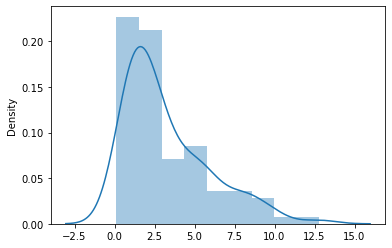

In [141]:
sns.distplot(np.random.default_rng().chisquare(3,100), hist=True)
plt.show()

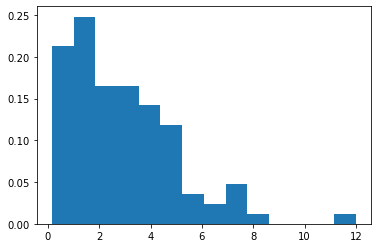

In [139]:
x = np.random.default_rng().chisquare(3, 100)
  
count, bins, ignored = plt.hist(x, 14, density = True)
plt.show()

 Below we can use the scipy library which has a built in chisquare function to easily visualise the chisquare distribution with various degrees of freedom using different linestyles:(https://www.statology.org/plot-chi-square-distribution-python/)

Text(0.5, 1.0, 'Chi-Square Distributions')

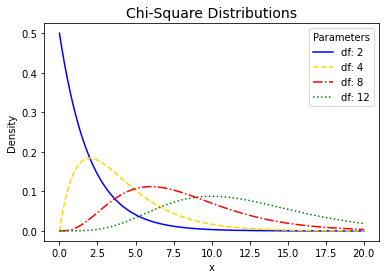

In [151]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#define multiple Chi-square distributions
plt.plot(x, chi2.pdf(x, df=2), label='df: 2', color='blue', linestyle='-')
plt.plot(x, chi2.pdf(x, df=4), label='df: 4', color='gold',linestyle='--')
plt.plot(x, chi2.pdf(x, df=8), label='df: 8', color='red',linestyle='-.')
plt.plot(x, chi2.pdf(x, df=12), label='df: 12', color='green',linestyle=':') 

#add legend to plot
plt.legend(title='Parameters')

#add axes labels and a title
plt.ylabel('Density')
plt.xlabel('x')
plt.title('Chi-Square Distributions', fontsize=14)

### Hypothesis testing using the Chi-Square Test

**Null Hypothesis**: We start by defining the null hypothesis (H0) which states that there is no relation between the variables. 
An **alternate hypothesis** would state that there is a significant relation between the two.

Suppose we want to know whether or not gender is associated with political party preference. We take a simple random sample of 500 voters and survey them on their political party preference.
Using the scipy.stats library we can easily perform the chi-square test on a simple dataset. The dataset is created using pandas and has 500 instances of gender and political party affliation.
This is then converted into a contingency table with frequencies using the crosstab function. Frequencies were passed into the chi2_contincency function in scipy and this returns:

chi2: The test statistic
p: The p-value of the test
dof: Degrees of freedom
expected: The expected frequencies, based on the marginal sums of the table

The significance level is the probability of rejecting the null hypothesis when it is true. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. Lower significance levels indicate that you require stronger evidence before you will reject the null hypothesis.For the sake of our example, we will choose a significance level of 0.05, which follows scientific convention.



In [192]:
from scipy.stats import chi2_contingency
df=pd.DataFrame
df = pd.DataFrame({'Gender' : ['M', 'M', 'M', 'F', 'F'] * 100,
                   'Party' : ['FiannaFall', 'Labour', 'FiannaFall', 'FineGael', 'FineGael'] * 100
                  })
contigency= pd.crosstab(df['Gender'], df['Party'])
contigency

c, p, dof, expected = chi2_contingency(contigency)


def significance(x):
    if x < 0.05:
        print('The p-value of {} is significant and the null hypothesis is rejected!'.format(p))
    else:
        print('The p-value of {} is not significant and the null hypothesis is accepted.'.format(p))
    
# Calling the significance function that we wrote, now with our p-value as the argument:
significance(p)

2.6691902155412655e-109
The p-value of 2.6691902155412655e-109 is significant and the null hypothesis is rejected!


 As can be seen from the code above there is a relationship between gender and political party preference. We don't know exactly what that relationship is but with the p value being <0.05 we can be confident that the variables are not independent of each other.

In [193]:
#https://wtmatter.com/numpy-chi-square-distribution/
#https://www.geeksforgeeks.org/numpy-random-chisquare-in-python/
#ref:https://github.com/BundleOfKent/Pearson-s-chi-squared-test-from-scratch/blob/master/Chi-squaredFromScratch_Medium.ipynb
#ref: https://python-bloggers.com/2020/09/how-to-run-chi-square-test-in-python/
# ref:https://medium.com/analytics-vidhya/pearsons-chi-squared-test-from-scratch-with-python-ba9e14d336c
#https://github.com/funkaj1981/chisquare_function/blob/master/chi2.ipynb
# https://allusesof.com/math/20-uses-of-the-chi-square-test/
# ref https://statisticsbyjim.com/hypothesis-testing/chi-squared-independence/

<br>


### The Normal Distribution in Numpy Random:

***


Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

The normal distribution is the most common type of distribution assumed in technical stock market analysis and in other types of statistical analyses. The standard normal distribution has two parameters: the mean and the standard deviation. For a normal distribution, 68% of the observations are within +/- one standard deviation of the mean, 95% are within +/- two standard deviations, and 99.7% are within +- three standard deviations. The normal distribution is one of the most important probability distributions in statistics because it fits many natural phenomena. For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution.

In the updated package new code should use the normal method if a default_rng() instance. 

**Parameters**
- loc:float or array_like of floats
Mean (“centre”) of the distribution.

- scale: float or array_like of floats
Standard deviation (spread or “width”) of the distribution. Must be non-negative.

- size:int or tuple of ints, optional
Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

**Returns**
- out: ndarray or scalar
Drawn samples from the parameterized normal distribution.


In [202]:
from numpy.random import default_rng
rng = default_rng()
# Lets generate a normal distribution of heights in m we use 1.75 as the mean and 0.15 as standard deviation in a sample size of 1000.
sample = np.random.normal (1.75,0.15,1000) 
#sample


### Visualisation of the normal distribution in heights in a displot using seaborn

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


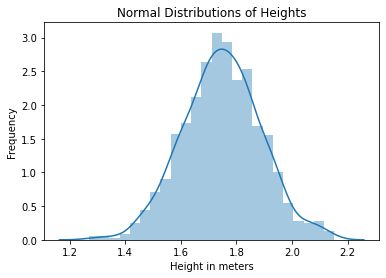

In [205]:
sns.distplot(sample, hist=True)
plt.title('Normal Distributions of Heights')
plt.xlabel('Height in meters')
plt.ylabel('Frequency')
plt.show()

### Visulaisation of the Normal Distribution of Height in a Histogram

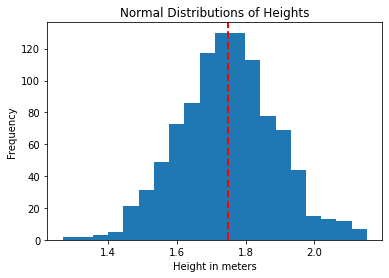

In [212]:
plt.hist(sample, bins=20)
plt.title('Normal Distributions of Heights')
plt.xlabel('Height in meters')
plt.ylabel('Frequency')
# plotting mean line
plt.axvline(sample.mean(), color='red', linestyle='dashed', linewidth=2)
# showing the plot
plt.show()


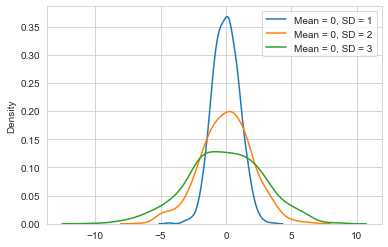

In [225]:
#https://www.alphacodingskills.com/numpy/numpy-normal-distribution.php
#Multiple probability density functions can be compared graphically using Seaborn kdeplot() function. 
#In the example below, pdf of three normal distributions (each with mean 0 and standard deviation 1, 2 and 3 respectively) are compared.
# The below is code for normal distribution with the same mean but difference in standard deviation
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different normal distribution
sns.kdeplot(np.random.default_rng().normal(0, 1, size))
sns.kdeplot(np.random.default_rng().normal(0, 2, size))
sns.kdeplot(np.random.default_rng().normal(0, 3, size))

plt.legend([r"Mean = 0, SD = 1", 
            r"Mean = 0, SD = 2", 
            r"Mean = 0, SD = 3"])
plt.show()

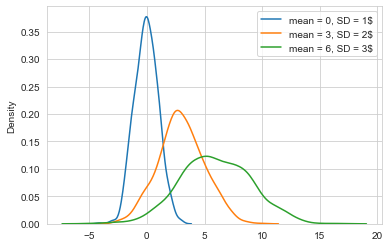

In [223]:
#Three normal distributions each with different mean and standard deviations are graphically compared.
#ref :https://www.alphacodingskills.com/numpy/numpy-normal-distribution.php

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different normal distribution
sns.kdeplot(np.random.default_rng().normal(0, 1, size))
sns.kdeplot(np.random.default_rng().normal(3, 2, size))
sns.kdeplot(np.random.default_rng().normal(6, 3, size))

plt.legend([r"mean = 0, SD = 1", 
            r"mean = 3, SD = 2", 
            r"mean = 6, SD = 3"])
plt.show()

### Applications of the Random Normal Distribution:

Empirical rule tells us that:

- 68% of the data falls within one standard deviation of the mean.
- 95% of the data falls within two standard deviations of the mean.
- 99.7% of the data falls within three standard deviations of the mean.

To find the probability of a value occurring within a range in a normal distribution, we just need to find the area under the curve in that range. i.e. we need to integrate the density function.

Since the normal distribution is a continuous distribution, the area under the curve represents the probabilities.



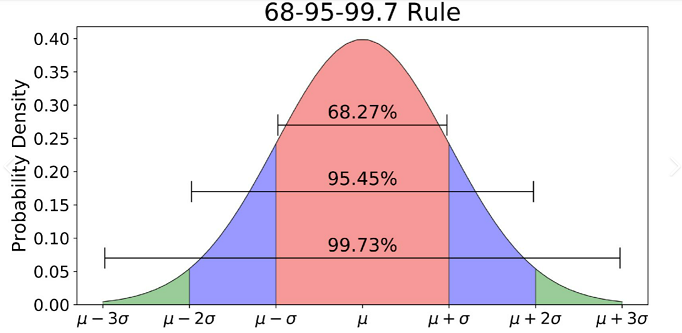

Suppose we have data of the shoe size of ladies in a town and the data follows a normal distribution, we have a sufficient sample size with mean equals 5.5 and the standard deviation is 1.
This information can be used to make a normal curve. We will use scipy.stats library when looking at this data.(https://www.askpython.com/python/normal-distribution)

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Probability Density')

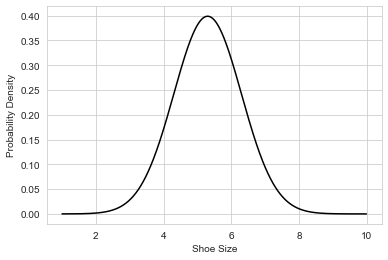

In [215]:
from scipy.stats import norm
# Creating the distribution
data = np.arange(1,10,0.01)
pdf = norm.pdf(data , loc = 5.5 , scale = 1 )

#Visualizing the distribution using seaborn library 
sns.set_style('whitegrid')
sns.lineplot(data, pdf , color = 'black')
plt.xlabel('Shoe Size')
plt.ylabel('Probability Density')

Now, if we were asked to pick one lady randomly from this distribution, then what is the probability that the shoe size of the lady will be smaller than 4.5 ?

We initialize the object of class norm with mean and standard deviation, then using .cdf( ) method passing a value up to which we need to find the cumulative probability value. The cumulative distribution function (CDF) calculates the cumulative probability for a given x-value.

The single line of code below finds the probability that there is a 15.86% chance that if a person is chosen randomly from the normal distribution with a mean of 5.5 and a standard deviation of 1, then the shoe size of the person will be below 4.5.

In [218]:
norm(loc = 5.5 , scale = 1).cdf(4.5)

0.15865525393145707

Now, again we were asked to pick one lady randomly from this distribution, then what is the probability that the shoe size of the person will be between 6.5 and 7.5.

Using the cdf function here again we can see that there is a 13.59% chance that the random person chosen has a shoesize of between 6.5 and 7.5.

In [219]:
cdf_upper_limit = norm(loc = 5.5 , scale = 1).cdf(7.5)
cdf_lower_limit = norm(loc = 5.5 , scale = 1).cdf(6.5)
 
prob = cdf_upper_limit - cdf_lower_limit
print(prob)

0.13590512198327787


Lets find he probability of random lady chosen having a shoesize of above 8 and a much higher probability of getting a good choice of shoes in the sales.

As can be seen from the probability below the chances are only 0.3% that the random lady chosen would have a shoesize greater than 8. This makes sense as 3SD withing the mean
would be 8.3 when the SD IS 1. 

In [221]:
cdf_value = norm(loc = 5.3 , scale = 1).cdf(8.0)
prob = 1- cdf_value
print(prob)

0.0034669738030406183


<br>

## The uniform distribution in NumPy Random:

***
In statistics, uniform distribution is a term used to describe a form of probability distribution where every possible outcome has an equal likelihood of happening. The probability is constant since each variable has equal chances of being the outcome.(https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/)

Discrete uniform distributions have a finite number of outcomes. A continuous uniform distribution is a statistical distribution with an infinite number of equally likely measurable values.

The concepts of discrete uniform distribution and continuous uniform distribution, as well as the random variables they describe, are the foundations of statistical analysis and probability theory.

For example, if you stand on a street corner and start to randomly hand a 100 dollar bill to any lucky person who walked by, then every passerby would have an equal chance of being handed the money. The percentage of the probability is 1 divided by the total number of outcomes (number of passersby). However, if you favored short people or women, they would have a higher chance of being given the 100 dollar bill than the other passersby. It would not be described as uniform probability.

A deck of cards also has a uniform distribution. This is because an individual has an equal chance of drawing a spade, a heart, a club, or a diamond. Another example of a uniform distribution is when a coin is tossed. The likelihood of getting a tail or head is the same. The graph of a uniform distribution is usually flat, whereby the sides and top are parallel to the x- and y-axes.

**Discrete uniform distribution**
In statistics and probability theory, a discrete uniform distribution is a statistical distribution where the probability of outcomes is equally likely and with finite values. A good example of a discrete uniform distribution would be the possible outcomes of rolling a 6-sided die. The possible values would be 1, 2, 3, 4, 5, or 6. In this case, each of the six numbers has an equal chance of appearing. Therefore, each time the 6-sided die is thrown, each side has a chance of 1/6.

The number of values is finite. It is impossible to get a value of 1.3, 4.2, or 5.7 when rolling a fair die. However, if another die is added and they are both thrown, the distribution that results is no longer uniform because the probability of the sums is not equal. Another simple example is the probability distribution of a coin being flipped. The possible outcomes in such a scenario can only be two. Therefore, the finite value is 2.

There are several ways in which discrete uniform distribution can be valuable for businesses. For example, it can arise in inventory management in the study of the frequency of inventory sales. It can provide a probability distribution that can guide the business on how to properly allocate the inventory for the best use of square footage.

Discrete uniform distribution is also useful in Monte Carlo simulation. This is a modeling technique that uses programmed technology to identify the probabilities of different outcomes. Monte Carlo simulation is often used to forecast scenarios and help in the identification of risks.

 

**Continuous uniform distribution**
Not all uniform distributions are discrete; some are continuous. A continuous uniform distribution (also referred to as rectangular distribution) is a statistical distribution with an infinite number of equally likely measurable values. Unlike discrete random variables, a continuous random variable can take any real value within a specified range.

A continuous uniform distribution usually comes in a rectangular shape. A good example of a continuous uniform distribution is an idealized random number generator. With continuous uniform distribution, just like discrete uniform distribution, every variable has an equal chance of happening. However, there is an infinite number of points that can exist.

In [96]:
# ref: https://www.investopedia.com/terms/u/uniform-distribution.asp#:~:text=Uniform%20distributions%20are%20probability%20distributions%20with%20equally%20likely,a%20continuous%20distribution%2C%20outcomes%20are%20continuous%20and%20infinite.
# ref: https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/
# ref : https://www.alphacodingskills.com/numpy/numpy-uniform-distribution.php
# ref : https://wtmatter.com/numpy-uniform-distribution/
# ref: https://www.datacamp.com/community/tutorials/probability-distributions-python

Below we shall draw a sample from a normal uniform distribution using the random generator uniform method.

**Parameters**
- low: float or array_like of floats, optional
Lower boundary of the output interval. All values generated will be greater than or equal to low. The default value is 0.

- high: float or array_like of floats
Upper boundary of the output interval. All values generated will be less than high. high - low must be non-negative. The default value is 1.0.

- size: int or tuple of ints, optional
Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if low and high are both scalars. Otherwise, np.broadcast(low, high).size samples are drawn.

**Returns**
- out: ndarray or scalar
Drawn samples from the parameterized uniform distribution.

In [227]:
# Create a random uniform distribution between -10 and -9 with the size as 100
s = np.random.default_rng().uniform(-10,-9,100)
s

array([-9.77644897, -9.36594654, -9.91373568, -9.50077196, -9.66917808,
       -9.9712626 , -9.67838141, -9.08648033, -9.6609061 , -9.63239408,
       -9.69054463, -9.51802029, -9.49032053, -9.51666312, -9.18848775,
       -9.54964077, -9.67344604, -9.54765067, -9.84283406, -9.57738085,
       -9.87546621, -9.05288667, -9.77615219, -9.84009095, -9.53742746,
       -9.6833926 , -9.88931349, -9.07488557, -9.39024046, -9.11446796,
       -9.04990369, -9.19989691, -9.78892309, -9.25001912, -9.27601443,
       -9.59054616, -9.0925046 , -9.33822228, -9.15071105, -9.09130423,
       -9.0528056 , -9.74217069, -9.87920558, -9.87389998, -9.83915111,
       -9.94221949, -9.02539218, -9.80876353, -9.75534637, -9.79415645,
       -9.58932529, -9.61496093, -9.35696742, -9.75775748, -9.20532677,
       -9.6024191 , -9.81803034, -9.15761222, -9.86983593, -9.92509477,
       -9.41305015, -9.11289336, -9.2418067 , -9.53930596, -9.22784396,
       -9.01410879, -9.11208723, -9.11483466, -9.13961347, -9.93

**Visualisation of the uniform distribution using a histogram:**

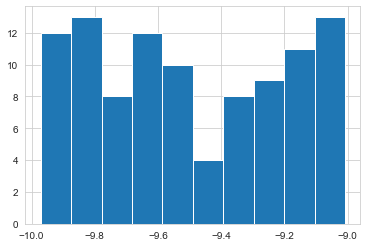

In [228]:
plt.hist(s)
plt.show()

In [99]:
# We can check to ensure the data set does not include points that were not included in the range. 
#All values are within the given interval: 
np.all(s <= -12)

False

In [100]:
np.all(s < 0)

True

**Visualisation of the distribution with the probability density function: As every value within the distribution has an equal chance to be drawn the pdf can be seen below as being constant throughout the range as denoted by the red line**

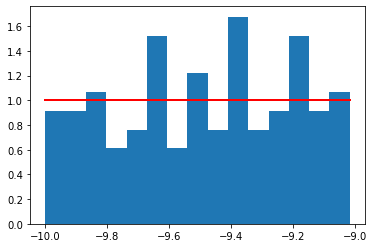

In [101]:
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

**Comparison of a Normal Random Distribution and a Normal Uniform Distribution:**

As can be seen below

- The distributions have different shapes.
- The normal distribution is bell-shaped, which means value near the center of the distribution are more likely to occur.
- The uniform distribution is rectangular-shaped, which means every value in the distribution is equally likely to occur.

C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kate_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


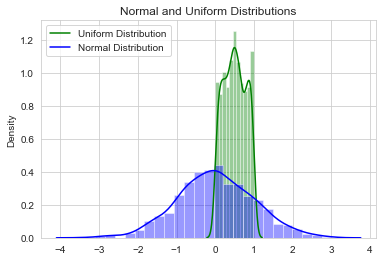

In [285]:
size = 1000
sns.distplot(np.random.default_rng().uniform(0,1, size), hist=True, color='g')
sns.distplot(np.random.default_rng().normal(0,1, size), hist=True, color='b')
plt.legend(["Uniform Distribution", 
            "Normal Distribution"])
plt.title('Normal and Uniform Distributions')
plt.show()

**Application of the random uniform distribution:**

Let's play a game by where 3 players all assigned different numbers. The random uniform generator will be used to generate a number in a specified range and the player with the number 
closest to the winning number will win the game.(https://www.geeksforgeeks.org/python-number-uniform-method/). This is a fair game as all the numbers within the normal uniform distribution have an equal cahnce of being selected.

In [254]:
# for using uniform()
import random, math
  
# initializing player numbers
player1 = 4.50
player2 = 3.78
player3 = 6.54
  
# generating winner random number
winner = np.random.default_rng().uniform(2, 9)
  
# finding closest 
diffa = math.fabs(winner - player1)
diffb = math.fabs(winner - player2)
diffc = math.fabs(winner - player3)
#print('The p-value of {} is significant and the null hypothesis is rejected!'.format(p))
print('The number picked by the golden ball is {}' .format(winner))
# printing winner
if(diffa < diffb and diffa < diffc):
    print("The winner of game is : ", end ="")
    print("Player1")
  
if(diffb < diffc and diffb < diffa):
    print("The winner of game is : ", end ="")
    print("Player2")
      
if(diffc < diffb and diffc < diffa):
    print("The winner of game is : ", end ="")
    print("Player3")

The number picked by the golden ball is 7.893860531235994
The winner of game is : Player3


<br>

### The Monte Carlo Simulation Using numpy random

***

The Monte Carlo method is a data analysis technique used in cases where there’s an intervention of random variables. It was invented during the second World War to improve decision-making under highly uncertain conditions. A Monte Carlo simulation is named as such after the famous casino district of  Monaco, because the element of ‘luck’ or ‘chance’ is inherent to the modeling approach here. Monte Carlo simulations use multiple values to replace uncertain variables, instead of just replacing them with a simple average—a ‘soft’ analysis method that doesn’t quite give accurate results. 

Businesses often deal with uncertain variables that can impact important outcomes. The Monte Carlo simulation can be used to mitigate risks by predicting the likelihood of these outcomes.

Artificial intelligence, stock prices, sales forecasting, project management, and pricing are just a few of Monte Carlo simulations’ many functions. Monte Carlo simulations can also be used to conduct sensitivity analysis and calculate the correlation of inputs.

ref: https://careerfoundry.com/en/blog/data-analytics/monte-carlo-method/#monte-carlo-machine-learning
ref: https://machinelearningmastery.com/monte-carlo-sampling-for-probability/
ref :https://pbpython.com/monte-carlo.html

<br>

## The Poisson Distribution

***

Poisson Distribution is a **Discrete Distribution** (will only take a discrete number of values). The Poisson distribution is the limit of the binomial distribution for large N.

It estimates how many times an event can happen in a specified time. e.g. If someone eats twice a day what is probability he will eat thrice?

**Parameters**
- lam: float or array_like of floats
Expected number of events occurring in a fixed-time interval, must be >= 0. A sequence must be broadcastable over the requested size.

- size: int or tuple of ints, optional
Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if lam is a scalar. Otherwise, np.array(lam).size samples are drawn.

**Returns**
- out: ndarray or scalar
Drawn samples from the parameterized Poisson distribution.

The following are the key criteria that the random variable follows the Poisson distribution.

- Individual events occur at random and independently in a given interval. This can be an interval of time or space.
- The mean number of occurrences of events in an interval (time or space) is finite and known. The mean number of occurrences is represented using lam

Lets begin by generating a random poisson distribution. With 5 as the number of events that happen in the fixed time interval. You will see from all the poisson distributions that the x-axis will never be below 0 there will never be a negative event number.  Lets say the 5 represents 5 hurricanes happen each year. When size is not used the poisson distribution method we return a single integer randomly.


In [278]:
rng = np.random.default_rng()
s = rng.poisson(5)
s


7

The horizontal axis is the index k, the number of occurrences. λ is the expected rate of occurrences. The vertical axis is the probability of k occurrences given λ. The function is defined only at integer values of k

(array([0.23333333, 0.        , 0.46666667, 0.        , 0.23333333,
        0.        , 0.        , 0.46666667, 0.        , 0.46666667,
        0.        , 0.23333333, 0.        , 0.23333333]),
 array([2.        , 2.42857143, 2.85714286, 3.28571429, 3.71428571,
        4.14285714, 4.57142857, 5.        , 5.42857143, 5.85714286,
        6.28571429, 6.71428571, 7.14285714, 7.57142857, 8.        ]),
 <BarContainer object of 14 artists>)

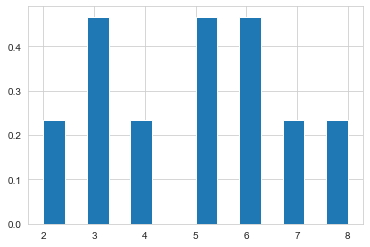

In [298]:
rng = np.random.default_rng()
s = rng.poisson(5, 10)
plt.hist(s,14, density=True)

**Visualisation of the poisson distribution with different expected number of events(lam)** 

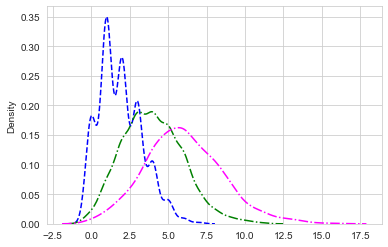

In [304]:
sns.kdeplot(rng.poisson(lam=2, size=1000),color='blue',linestyle='--')
sns.kdeplot(rng.poisson(lam=4, size=1000),color='green',linestyle='-.')
sns.kdeplot(rng.poisson(lam=6, size=1000),color= 'magenta',linestyle='dashdot')
plt.show()

Below the three types of distributions compared are binomial,normal and poisson. By making the mean=5 for normal the lam=5 for poisson and probability 0.5 for binomial we can visualise
these distributions as being quite similar however what they represent is very different.


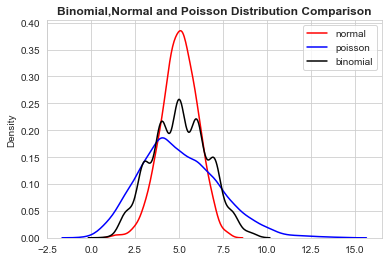

In [315]:
# ref: https://www.w3schools.com/python/numpy/numpy_random_poisson.asp
sns.kdeplot(rng.normal(loc=5, scale=1, size=1000), color='red', label='normal')
sns.kdeplot(rng.poisson(lam=5, size=1000), color='blue', label='poisson')
sns.kdeplot(rng.binomial(n=10, p=0.5, size=1000),color='black', label='binomial')
legend = plt.legend()

plt.title('Binomial,Normal and Poisson Distribution Comparison', fontweight = 'bold')
plt.grid(True)


plt.show()


**Applications of the Poisson Distribution**:

We can calculate probabilities using the poisson distribution. For this we must import poisson from the scipy library.I will use the poisson.pmf(k, mu) and poisson.cdf(k, mu) functions to calculate probabilities related to the Poisson distribution.

A store sells 10 apples per day on average. What is the probability that they will sell 15 apples on a given day? 


In [316]:
from scipy.stats import poisson
#calculate probability
poisson.pmf(k=15, mu=10)


0.034718069630684245

The store has a 3.47% probability of selling 15 apples in one day

Suppose a given restaurant receives an average of 100 customers per day. We can use the Poisson distribution calculator to find the probability that the restaurant receives more than a certain number of customers:

Calculate
P(X > 110 customers)
P(X > 120 customers)
P(X > 130 customers)

In [319]:
#calculate probability
x=1-poisson.cdf(k=110, mu=100)
print('The probability of the restarant having more than 110 customers in a day is {}'. format(x))
x1= 1-poisson.cdf(k=120, mu=100)
print('The probability of the restarant having more than 110 customers in a day is {}'. format(x1))
x2=1-poisson.cdf(k=130, mu=100)
print('The probability of the restarant having more than 110 customers in a day is {}'. format(x2))



The probability of the restarant having more than 110 customers in a day is 0.14713734844226967
The probability of the restarant having more than 110 customers in a day is 0.02266932907835273
The probability of the restarant having more than 110 customers in a day is 0.0017068403705013946


The number of buses that come on a bus stop in span of 30 minutes is 1. Poisson distribution can be used to model the probability of different number of buses, X, coming to the bus stop within the next 30 minutes where X can take value of 0, 1, 2, 3, 4

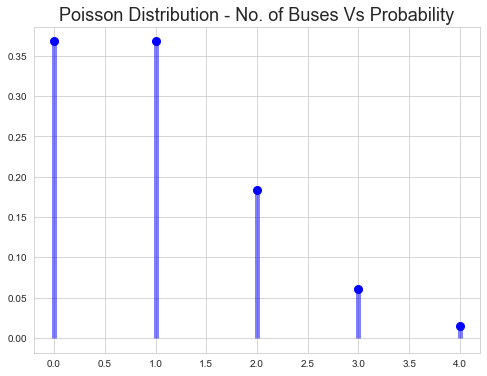

In [327]:
#https://vitalflux.com/poisson-distribution-explained-with-python-examples/
# Random variable representing number of buses
# Mean number of buses coming to bus stop in 30 minutes is 1
#
X = np.arange(0,5,1)
lmbda = 1
#
# Probability values
#
busprob= poisson.pmf(X, lmbda)
#
# Plot the probability distribution
#
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, poisson_pd, 'bo', ms=8, label='poisson pmf')
plt.title("Poisson Distribution - No. of Buses Vs Probability", fontsize="18")
ax.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)
plt.show()

<br>

## Explain the use of seeds in generating pseudorandom numbers.

***

NumPy random seed is simply a function that sets the random seed of the NumPy pseudo-random number generator. It provides an essential input that enables NumPy to generate pseudo-random numbers for random processes.

Pseudo-random numbers are numbers that appear to be random, but are not actually random.
There’s a fundamental problem when using computers to simulate or work with random processes.Computers are completely deterministic, not random. Another way of saying this is that if you give a computer a certain input, it will precisely follow instructions to produce an output. Essentially, the behavior of computers is NOT random.Computers solve the problem of generating “random” numbers the same way that they solve essentially everything: with an algorithm.Computer scientists have created a set of algorithms for creating psuedo random numbers, called “pseudo-random number generators.”These algorithms can be executed on a computer.As such, they are completely deterministic. However, the numbers that they produce have properties that approximate the properties of random numbers.

Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributionS. Since Numpy version 1.17.0 the Generator can be initialized with a number of different BitGenerators. It exposes many different probability distributions.The legacy RandomState random number routines are still available, but limited to a single BitGenerator.By default, Generator uses bits provided by PCG64 which has better statistical properties than the legacy MT19937 used in RandomState.  

Seeds can be passed to any of the BitGenerators. The provided value is mixed via SeedSequence to spread a possible sequence of seeds across a wider range of initialization states for the BitGenerator. 
The numpy.random.seed function provides the input (i.e., the seed) to the algorithm that generates pseudo-random numbers in NumPy.If you give a pseudo-random number generator the same input, you’ll get the same output. In order to get repeatable results when we are using “random” functions in NumPy, we need to use numpy.random.seed.

In [333]:
# Lets compare numbers generated using a seed and not using a seed. The below code does not have a seed. It will generate seemingly pseudorandom numbers every time the code is run.
rng.random()

0.8284448852745308

In [331]:
# The seed has been set in the below code as 10. Everytime this code is run the random pseudonumber will remain the same.
rng = default_rng(10)
rng.random(6)

0.9560017096289753

In [339]:
rng=default_rng(5)
rng.integers(4)

2

In [342]:
rng.integers(4)

3

In [345]:
rng = default_rng(0) # we have set the seed here to zero. The code will generate the same number each time the cell is run.
x=[]
for i in range (2):
    a = rng.integers(1,6)
    x.append(a)
print(x)   

[5, 4]


In [344]:
# if we imput the same formula below without setting the rng(random number generator) with a seed number the number will change each time code is ran
x=[]
for i in range (10):
    a = rng.integers(1,6)
    x.append(a)
print(x) 

[1, 1, 1, 1, 1, 5, 1, 4, 4, 2]


## Backround Information on NumPy (5)

https://www.youtube.com/watch?v=ZB7BZMhfPgk Introduction to Numerical Computing with NumPy | SciPy 2019 Tutorial 1.13.00


### References:
[1] [API Reference Random sampling](https://numpy.org/devdocs/user/whatisnumpy.html)
[2] [Find the best 64-bit Simulation PRNG](https://nullprogram.com/blog/2017/09/21/)
[3] [PCG, A Family of Better Random Number Generators](https://www.pcg-random.org/)
[4] [Pseudo Random Number Generator (PRNG)](https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/)
[5] [What is the difference between CSPRNG and PRNG?](https://crypto.stackexchange.com/questions/12436/what-is-the-difference-between-csprng-and-prng)
[6] [Python NumPy | Random](https://www.bing.com/videos/search?q=numpy.random.permutation&ru=%2fvideos%2fsearch%3fq%3dnumpy.random.permutation%26qs%3dOS%26form%3dQBVR%26sp%3d3%26pq%3dnumpy%2520random%2520permutation%26sk%3dHS2%26sc%3d5-24%26cvid%3dBFC1C4B64C6F46818C039948F4DFFE46&view=detail&mid=DA31CB36C9D383DD4465DA31CB36C9D383DD4465&&FORM=VDRVSR)
[7] [Python Program to Generate Random Numbers](https://codescracker.com/python/program/python-program-generate-random-numbers.htm)
[8][Random Number Generator Using Numpy](https://www.datacamp.com/community/tutorials/numpy-random)
[9][Simulating Coin Toss Experiment in Python with NumPy](https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/)
[10][NumPy random choice](https://www.educba.com/numpy-random-choice/)
[11][NUMPY RANDOM CHOICE: HOW TO USE IT?](https://www.codeleaks.io/numpy-random-choice-python/)
[12][Make Your First Python Game: Rock, Paper, Scissors!](https://realpython.com/python-rock-paper-scissors/)
[13][Permutations API reference](https://numpy.org/devdocs/reference/random/generator.html)
[14][Pandas DataFrames: Permutation](https://www.bing.com/videos/search?q=numpy.random.permutation&&view=detail&mid=00F62AB43A84335434AB00F62AB43A84335434AB&&FORM=VRDGAR&ru=%2Fvideos%2Fsearch%3Fq%3Dnumpy.random.permutation%26qs%3DOS%26form%3DQBVR%26sp%3D3%26pq%3Dnumpy%2520random%2520permutation%26sk%3DHS2%26sc%3D5-24%26cvid%3DBFC1C4B64C6F46818C039948F4DFFE46)
[15][Numpy Random Shuffle: How To Shuffle Array In Python](https://appdividend.com/2020/06/04/numpy-random-shuffle-method-in-python/#:~:text=Numpy%20random%20shuffle%20%28%29%20The%20random.shuffle%20%28%29%20method,returns%20the%20modified%20form%20of%20the%20original%20sequence)
[16][NumPy - Binomial Distribution](https://www.alphacodingskills.com/numpy/numpy-binomial-distribution.php)






[2](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html)
[3](https://www.datacamp.com/community/tutorials/numpy-random)
[4](https://www.w3schools.com/python/numpy/numpy_random_permutation.asp)
[5](https://www.youtube.com/watch?v=ZB7BZMhfPgk)
[6](https://numpy.org/devdocs/reference/random/index.html)

ref: https://www.bing.com/videos/search?q=numpy+random+poisson&&view=detail&mid=0F776D0CC35A1B111E920F776D0CC35A1B111E92&&FORM=VDRVRV
ref: https://www.random.org/randomness/
ref: https://www.redhat.com/en/blog/understanding-random-number-generators-and-their-limitations-linux
https://numpy.org/devdocs/reference/random/generator.html

https://www.bing.com/videos/search?q=numpy+random+package&&vail&mid=1FC33C069205576E13F61FC33C069205576E13F6&iew=detrvsmid=809DCC1B5D2289AD8843809DCC1B5D2289AD8843&FORM=VDRVRV

https://www.youtube.com/watch?v=zWL3z7NMqAs&list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-&index=19